In [1]:
def readTextFile(path):
    with open(path) as f:
        captions=f.read()
    return captions

In [2]:
caption_path='C:/Users/KIIT/OneDrive/Desktop/minor_project/archive (5)/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'


In [3]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')[:-1]

In [4]:
first,second=captions[0].split('\t')
#print(first.split(" ."))[0]

In [5]:
descriptions={}
for x in captions:
    first,second=x.split('\t')
    img_name=first.split(".")[0]
    if descriptions.get(img_name) is None:
        descriptions[img_name]=[]
    descriptions[img_name].append(second)

In [6]:
descriptions['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [7]:
import matplotlib.pyplot as plt
import cv2

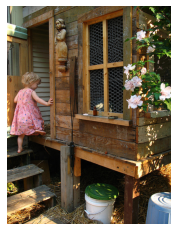

In [8]:
images_path='C:/Users/KIIT/OneDrive/Desktop/minor_project/archive (5)/Flickr_Data/Images/'
img=cv2.imread(images_path+'1000268201_693b08cb0e.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import re
import nltk
from nltk.corpus import stopwords
import string
import json
import tensorflow
from time import time
import pickle
from keras.applications.vgg16 import VGG16
tensorflow.keras.utils.image_dataset_from_directory
from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.preprocessing import load_img, img_to_array
from tensorflow.keras.utils import *
#from keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions
#from keras.preprocessing.sequence import pad_sequences
#from keras.layers.merge import add
#from keras.preprocessing import image
from keras.models import Model,load_model
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input,Dense,Dropout,Embedding,LSTM
from keras.layers import concatenate

In [10]:
def clean_text(sentence):
    sentence=sentence.lower()
    sentence=re.sub("[^a-z]+"," ",sentence)
    sentence=sentence.split()
    sentence=[s for s in sentence if len(s)>1]
    sentence=" ".join(sentence)
    return sentence
    

In [11]:
clean_text("A cat is sitting over the house number # 64")

'cat is sitting over the house number'

In [12]:
for key,caption_list in descriptions.items():
    for i in range(len(caption_list)):
        caption_list[i]=clean_text(caption_list[i])

In [13]:
descriptions["1000268201_693b08cb0e"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [14]:
with open("descriptions_1.txt","w") as f:
    f.write(str(descriptions))

In [15]:
#descriptions= None
with open("descriptions_1.txt",'r')as f:
    descriptions=f.read()
json_acceptable_string=descriptions.replace("'","\"")
descriptions=json.loads(json_acceptable_string)


In [16]:
print(type(descriptions))

<class 'dict'>


In [17]:
vocab=set()
for key in descriptions.keys():
    [vocab.update(sentence.split())for sentence in descriptions[key]]
    
print("vocab size: %d "% len(vocab))

vocab size: 8424 


remove most infrequent word

In [18]:
total_words=[]
for key in descriptions.keys():
    [total_words.append(i)for des in descriptions[key]for i in des.split()]
print("Total Words %d"%len(total_words))

Total Words 373837


In [19]:
#filter words from the vocab according  to ceratin threshold frequency


In [20]:
import collections
counter = collections.Counter(total_words)
freq_cnt=dict(counter)
print(freq_cnt)

{'child': 1545, 'in': 18987, 'pink': 739, 'dress': 348, 'is': 9345, 'climbing': 507, 'up': 1302, 'set': 109, 'of': 6723, 'stairs': 109, 'an': 2432, 'entry': 1, 'way': 53, 'girl': 3328, 'going': 149, 'into': 1074, 'wooden': 284, 'building': 511, 'little': 1768, 'playhouse': 6, 'the': 18420, 'to': 3176, 'her': 1178, 'cabin': 4, 'black': 3848, 'dog': 8138, 'and': 8863, 'spotted': 38, 'are': 3505, 'fighting': 133, 'tri': 14, 'colored': 221, 'playing': 2008, 'with': 7765, 'each': 430, 'other': 773, 'on': 10746, 'road': 398, 'white': 3959, 'brown': 2578, 'spots': 29, 'staring': 57, 'at': 2916, 'street': 944, 'two': 5643, 'dogs': 2125, 'different': 46, 'breeds': 5, 'looking': 744, 'pavement': 48, 'moving': 41, 'toward': 146, 'covered': 372, 'paint': 62, 'sits': 577, 'front': 1386, 'painted': 64, 'rainbow': 22, 'hands': 246, 'bowl': 30, 'sitting': 1368, 'large': 1237, 'small': 1278, 'grass': 1622, 'plays': 526, 'fingerpaints': 3, 'canvas': 6, 'it': 401, 'there': 304, 'pigtails': 14, 'painting'

In [21]:
sorted_freq_cnt= sorted(freq_cnt.items(),reverse=True,key=lambda x:x[1])
#Filters
threshold=15
sorted_freq_cnt=[x for x in sorted_freq_cnt if x[1] >threshold ]
total_words=[x[0] for x in sorted_freq_cnt]

In [22]:
sorted_freq_cnt

[('in', 18987),
 ('the', 18420),
 ('on', 10746),
 ('is', 9345),
 ('and', 8863),
 ('dog', 8138),
 ('with', 7765),
 ('man', 7275),
 ('of', 6723),
 ('two', 5643),
 ('white', 3959),
 ('black', 3848),
 ('boy', 3581),
 ('are', 3505),
 ('woman', 3403),
 ('girl', 3328),
 ('to', 3176),
 ('wearing', 3062),
 ('at', 2916),
 ('people', 2887),
 ('water', 2790),
 ('red', 2691),
 ('young', 2630),
 ('brown', 2578),
 ('an', 2432),
 ('his', 2357),
 ('blue', 2279),
 ('dogs', 2125),
 ('running', 2073),
 ('through', 2032),
 ('playing', 2008),
 ('while', 1968),
 ('shirt', 1962),
 ('down', 1843),
 ('standing', 1789),
 ('ball', 1783),
 ('little', 1768),
 ('grass', 1622),
 ('snow', 1547),
 ('child', 1545),
 ('person', 1542),
 ('jumping', 1473),
 ('over', 1415),
 ('three', 1389),
 ('front', 1386),
 ('sitting', 1368),
 ('holding', 1324),
 ('up', 1302),
 ('field', 1283),
 ('small', 1278),
 ('by', 1249),
 ('large', 1237),
 ('green', 1234),
 ('one', 1223),
 ('group', 1218),
 ('yellow', 1217),
 ('her', 1178),
 ('walk

In [23]:
print(len(total_words))

1489


In [24]:
train_file_data_path=('C:/Users/KIIT/OneDrive/Desktop/minor_project/archive (5)/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt')

In [25]:
test_file_data_path=('C:/Users/KIIT/OneDrive/Desktop/minor_project/archive (5)/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt')

In [26]:
train_file_data = open(train_file_data_path, 'rb').read().decode('utf-8')

In [27]:
test_file_data= open(test_file_data_path, 'rb').read().decode('utf-8')

In [28]:
print(train_file_data)

2513260012_03d33305cf.jpg
2903617548_d3e38d7f88.jpg
3338291921_fe7ae0c8f8.jpg
488416045_1c6d903fe0.jpg
2644326817_8f45080b87.jpg
218342358_1755a9cce1.jpg
2501968935_02f2cd8079.jpg
2699342860_5288e203ea.jpg
2638369467_8fc251595b.jpg
2926786902_815a99a154.jpg
2851304910_b5721199bc.jpg
3423802527_94bd2b23b0.jpg
3356369156_074750c6cc.jpg
2294598473_40637b5c04.jpg
1191338263_a4fa073154.jpg
2380765956_6313d8cae3.jpg
3197891333_b1b0fd1702.jpg
3119887967_271a097464.jpg
2276499757_b44dc6f8ce.jpg
2506892928_7e79bec613.jpg
2187222896_c206d63396.jpg
2826769554_85c90864c9.jpg
3097196395_ec06075389.jpg
3603116579_4a28a932e2.jpg
3339263085_6db9fd0981.jpg
2532262109_87429a2cae.jpg
2076906555_c20dc082db.jpg
2502007071_82a8c639cf.jpg
3113769557_9edbb8275c.jpg
3325974730_3ee192e4ff.jpg
1655781989_b15ab4cbff.jpg
1662261486_db967930de.jpg
2410562803_56ec09f41c.jpg
2469498117_b4543e1460.jpg
69710415_5c2bfb1058.jpg
3414734842_beb543f400.jpg
3006217970_90b42e6b27.jpg
2192411521_9c7e488c5e.jpg
3535879138_9281d

In [29]:
train=[row.split(".")[0] for row in train_file_data.split("\n")[:-1]]
test=[row.split(".")[0]for row in test_file_data.split("\n")[:-1]]

In [30]:
train[:10]

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87',
 '218342358_1755a9cce1',
 '2501968935_02f2cd8079',
 '2699342860_5288e203ea',
 '2638369467_8fc251595b',
 '2926786902_815a99a154']

In [31]:
train_descriptions={}
for img_id in train:
    train_descriptions[img_id]=[]
    for cap in descriptions[img_id]:
        cap_to_append="startseq " + cap + "endseq"
        train_descriptions[img_id].append(cap_to_append)

In [32]:
train_descriptions["1000268201_693b08cb0e"]

['startseq child in pink dress is climbing up set of stairs in an entry wayendseq',
 'startseq girl going into wooden buildingendseq',
 'startseq little girl climbing into wooden playhouseendseq',
 'startseq little girl climbing the stairs to her playhouseendseq',
 'startseq little girl in pink dress going into wooden cabinendseq']

In [33]:
model=ResNet50(weights="imagenet",input_shape=(224,224,3))
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [34]:
model_new=Model(model.input,model.layers[-2].output)

In [35]:
#from keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions
from tensorflow.keras.utils import load_img,img_to_array
tensorflow.keras.utils.load_img
import tensorflow as tf
import keras.utils as image
from tensorflow import keras

In [36]:
def preprocess_img(img):
    img=image.load_img(img,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    return img

In [37]:
#img=preprocess_img(images_path+'1000268201_693b08cb0e.jpg')
#plt.imshow(img[0])
#plt.axis("off")
#plt.show()

In [38]:
def encode_image(img):
    img=preprocess_img(img)
    feature_vector=model_new.predict(img)
    feature_vector=feature_vector.reshape((-1,))
    #print(feature_vector.shape)
    return feature_vector
    

In [39]:
encode_image(images_path+'1000268201_693b08cb0e.jpg')

1/1 [==============================] - 1s 1s/step


array([0.06535926, 0.16782555, 0.3251761 , ..., 0.05107139, 0.32821193,
       1.0043361 ], dtype=float32)

In [40]:
start=time()
encoding_train={}
#image_id-->feature
for ix,img_id in enumerate(train):
    img_path=images_path+"/"+img_id+".jpg"
    encoding_train[img_id]=encode_image(img_path)
    
    if ix%100==0:
        print("Encoding in progress Time step %d "%ix)
end_t=time()
print("Total Time Taken :",end_t-start)

1/1 [==============================] - 0s 163ms/step
Encoding in progress Time step 0 
1/1 [==============================] - 0s 208ms/step
Encoding in progress Time step 100 
1/1 [==============================] - 0s 221ms/step


1/1 [==============================] - 0s 221ms/step
Encoding in progress Time step 200 
1/1 [==============================] - 0s 219ms/step
Encoding in progress Time step 300 
1/1 [==============================] - 0s 205ms/step


1/1 [==============================] - 0s 227ms/step
Encoding in progress Time step 400 
1/1 [==============================] - 0s 225ms/step


1/1 [==============================] - 0s 220ms/step
Encoding in progress Time step 500 
1/1 [==============================] - 0s 228ms/step
Encoding in progress Time step 600 
1/1 [==============================] - 0s 250ms/step


1/1 [==============================] - 0s 229ms/step
Encoding in progress Time step 700 
1/1 [==============================] - 0s 245ms/step


1/1 [==============================] - 0s 247ms/step
Encoding in progress Time step 800 
1/1 [==============================] - 0s 339ms/step
Encoding in progress Time step 900 
1/1 [==============================] - 0s 340ms/step


1/1 [==============================] - 0s 319ms/step
Encoding in progress Time step 1000 
1/1 [==============================] - 0s 247ms/step


1/1 [==============================] - 0s 258ms/step
Encoding in progress Time step 1100 
1/1 [==============================] - 0s 267ms/step
Encoding in progress Time step 1200 
1/1 [==============================] - 0s 268ms/step


1/1 [==============================] - 0s 281ms/step
Encoding in progress Time step 1300 
1/1 [==============================] - 0s 319ms/step


1/1 [==============================] - 0s 334ms/step
Encoding in progress Time step 1400 
1/1 [==============================] - 0s 428ms/step
Encoding in progress Time step 1500 
1/1 [==============================] - 1s 777ms/step


1/1 [==============================] - 1s 792ms/step
Encoding in progress Time step 1600 
1/1 [==============================] - 1s 854ms/step


1/1 [==============================] - 1s 683ms/step
Encoding in progress Time step 1700 
1/1 [==============================] - 1s 809ms/step
Encoding in progress Time step 1800 
1/1 [==============================] - 1s 786ms/step


1/1 [==============================] - 1s 952ms/step
Encoding in progress Time step 1900 
1/1 [==============================] - 0s 339ms/step


1/1 [==============================] - 1s 896ms/step
Encoding in progress Time step 2000 
1/1 [==============================] - 1s 997ms/step
Encoding in progress Time step 2100 
1/1 [==============================] - 1s 979ms/step


1/1 [==============================] - 1s 913ms/step
Encoding in progress Time step 2200 
1/1 [==============================] - 1s 1s/step
Encoding in progress Time step 2300 
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 2400 
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
Encoding in progress Time step 2500 
1/1 [==============================] - 1s 1s/step
Encoding in progress Time step 2600 
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
Encoding in progress Time step 2700 
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 2800 
1/1 [==============================] - 1s 1s/step
Encoding in progress Time step 2900 
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
Encoding in progress Time step 3000 
1/1 [==============================] - 1s 1s/step
Encoding in progress Time step 3100 
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
Encoding in progress Time step 3200 
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
Encoding in progress Time step 3300 
1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 3400 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 3500 
1/1 [==============================] - 1s 1s/step
Encoding in progress Time step 3600 
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
Encoding in progress Time step 3700 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 3800 
1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 3900 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 4000 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 4100 
1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 4200 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 4300 
1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 4400 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 4500 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 4600 
1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 4700 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 4800 
1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 4900 


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 5000 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 5100 
1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 5200 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 5300 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 5400 
1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 5500 
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 5600 
1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 5700 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 5800 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Encoding in progress Time step 5900 
1/1 [==============================] - 2s 2s/step
Total Time Taken : 8068.225601911545


In [41]:
#store everything in the disk

In [42]:
with open("encoded_train_features.pk1","wb") as f:
    pickle.dump(encoding_train,f)

In [43]:
start=time()
encoding_test={}
#image_id-->feature
for ix,img_id in enumerate(test):
    img_path=images_path+"/"+img_id+".jpg"
    encoding_test[img_id]=encode_image(img_path)
    
    if ix%100==0:
        print("  Test encoding in progress Time step %d "%ix)
end_t=time()
print("Total Time Taken :",end_t-start)

1/1 [==============================] - 2s 2s/step
  Test encoding in progress Time step 0 
1/1 [==============================] - 2s 2s/step
  Test encoding in progress Time step 100 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
  Test encoding in progress Time step 200 
1/1 [==============================] - 2s 2s/step
  Test encoding in progress Time step 300 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
  Test encoding in progress Time step 400 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
  Test encoding in progress Time step 500 
1/1 [==============================] - 2s 2s/step
  Test encoding in progress Time step 600 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
  Test encoding in progress Time step 700 
1/1 [==============================] - 2s 2s/step
  Test encoding in progress Time step 800 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
  Test encoding in progress Time step 900 
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
Total Time Taken : 2183.3181686401367


In [44]:
with open("encoded_test_features.pk1","wb") as f:
    pickle.dump(encoding_test,f)

# Data prrprocessing for cation

In [45]:
len(total_words)

1489

In [46]:
word_to_idx={}
idx_to_word={}

for  i,word in enumerate(total_words):
    word_to_idx[word]=i+1
    idx_to_word[i+1]=word

In [47]:
word_to_idx["dog"]
idx_to_word[1]

'in'

In [48]:
print(len(idx_to_word))

1489


In [49]:
idx_to_word[1490]='startseq'
word_to_idx['startseq']=1490

idx_to_word[1491]='endseq'
word_to_idx['endseq']=1491

vocab_size=len(word_to_idx)+1
print("Vocab Size",vocab_size)

Vocab Size 1492


In [50]:
max_len=0
for key in train_descriptions.keys():
    for cap in train_descriptions[key]:
        max_len=max(max_len,len(cap.split()))
print(max_len)

34


RNN Using LSTM(u)

In [73]:
def data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size):
    X1,X2,y=[],[],[]
    n=0
    while True:
        for key,desc_list in train_descriptions.items():
            n+=1
            photo=encoding_train[key]
            for desc in desc_list:
                seq=[word_to_idx[word] for word in desc.split() if word in word_to_idx]
                for i in range(1,len(seq)):
                    xi=seq[0:i]
                    yi=seq[i]
                    
                    xi=pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi=to_categorical([yi],num_classes=vocab_size)[0]
                
                    X1.append(photo)
                    X2.append(xi)
                    y.append(yi)
                if n==batch_size:
                    yield [[np.array(X1),np.array(X2)],np.array(y)]
                    X1,X2,y=[],[],[]
                    n=0
                

In [52]:
f_path='C:/Users/KIIT/OneDrive/Desktop/minor_project/glove.6B.50d.txt'

In [53]:
f = open(f_path,encoding="utf8")

In [54]:
embedding_index={}
for line in f:
    values=line.split()
    word=values[0]
    word_embedding=np.array(values[1:],dtype='float')
    embedding_index[word]=word_embedding

In [55]:
f.close()

In [56]:
embedding_index['apple']

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ])

In [57]:
def get_embedding_matrix():
    emb_dim=50
    matrix=np.zeros((vocab_size,emb_dim))
    for word,idx in word_to_idx.items():
        embedding_vector=embedding_index.get(word)
        if embedding_vector is not None:
            matrix[idx]=embedding_vector
    return matrix

In [58]:
print(type(word_to_idx))

<class 'dict'>


In [59]:
word_to_idx['the']

2

In [60]:
embedding_matrix=get_embedding_matrix()
embedding_matrix.shape

(1492, 50)

Model architecture


In [61]:
input_img_features=Input(shape=(2048,))
inp_img1 = Dropout(0.3)(input_img_features)
inp_img2 = Dense(256,activation='relu')(inp_img1)

In [62]:
input_captions=Input(shape=(max_len,))
inp_cap1=Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2=Dropout(0.3)(inp_cap1)
inp_cap3=LSTM(256)(inp_cap2)

In [63]:
inp_img2.shape

TensorShape([None, 256])

In [64]:
from keras.layers import add, dot, concatenate

In [65]:
decoder1=add([inp_img2,inp_cap3])
decoder2=Dense(256,activation='relu')(decoder1)
outputs=Dense(vocab_size,activation='softmax')(decoder2)
model=Model(inputs=[input_img_features,input_captions],outputs=outputs)

In [66]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 50)       74600       ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_2[0][0]']                
                                                                                            

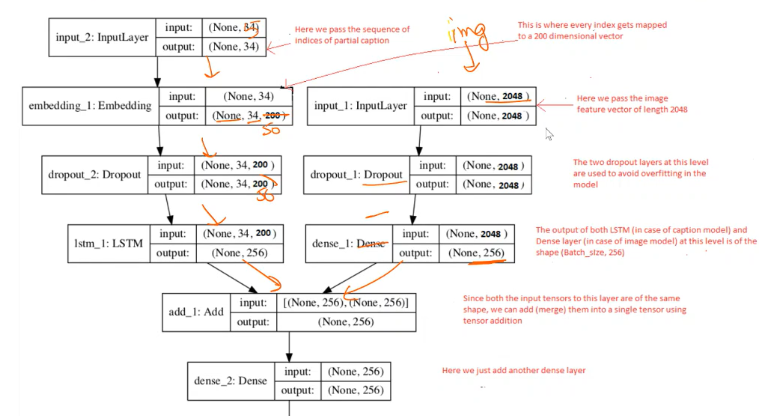


In [67]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable=False


In [68]:
model.compile(loss='categorical_crossentropy',optimizer="adam")

In [74]:
epochs=20
batch_size=3
steps=len(train_descriptions)//batch_size
for i in range(epochs):
    generator=data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size)
    model.fit(generator,epochs=1,steps_per_epoch=steps,verbose=1)
    model.save('./model_weights/model_' + str(i) + '.h5')

2000/2000 [==============================] - 6443s 3s/step - loss: 2.6719


In [98]:
def predict_caption(photo):
    in_text="startseq"
    for i in range(max_len):
        sequence=[word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence=pad_sequences([sequence],maxlen=max_len,padding='post')
        ypred=model.predict([photo,sequence]) 
        ypred=ypred.argmax() #Word with max prob always -Greedy Sampling
        word=idx_to_word[ypred]
        in_text+=' '+ word
        if word=='endseq':
            break
    final_caption=in_text.split()
    final_caption=final_caption[1:-1]
    final_caption=' '.join(final_caption)
    return final_caption

In [94]:
#sequence=[word_to_idx[w] for w in in_text.split() if w in word_to_idx]

NameError: name 'in_text' is not defined

1/1 [==============================] - 0s 33ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


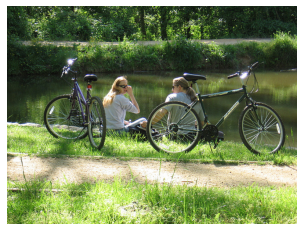

1/1 [==============================] - 0s 29ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


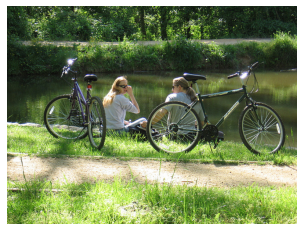

1/1 [==============================] - 0s 57ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


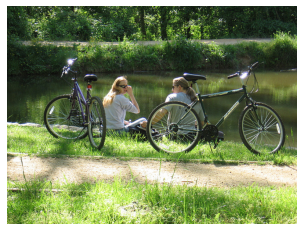

1/1 [==============================] - 0s 32ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


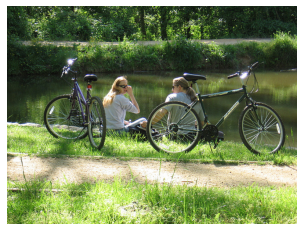

1/1 [==============================] - 0s 40ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


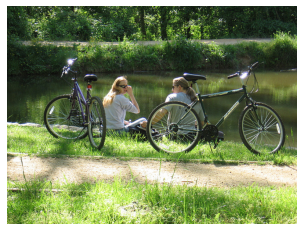

1/1 [==============================] - 0s 38ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


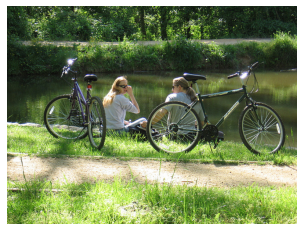

1/1 [==============================] - 0s 47ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


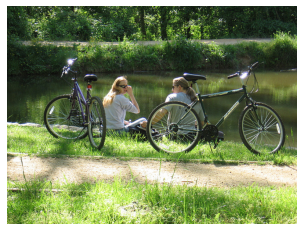

1/1 [==============================] - 0s 30ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


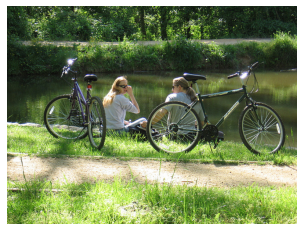

1/1 [==============================] - 0s 37ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


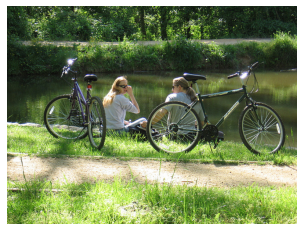

1/1 [==============================] - 0s 61ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


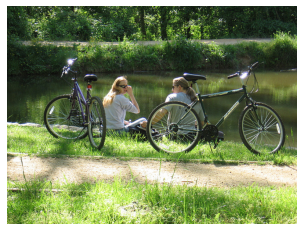

1/1 [==============================] - 0s 43ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


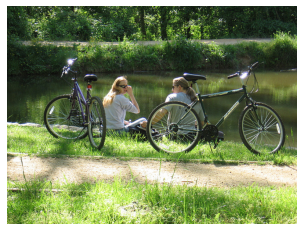

1/1 [==============================] - 0s 37ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


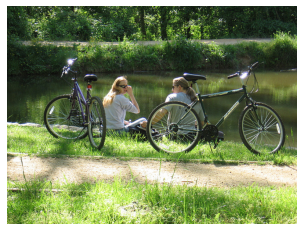

1/1 [==============================] - 0s 33ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


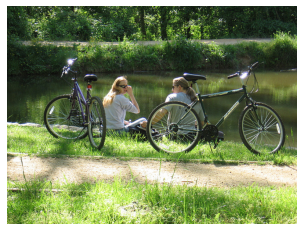

1/1 [==============================] - 0s 37ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


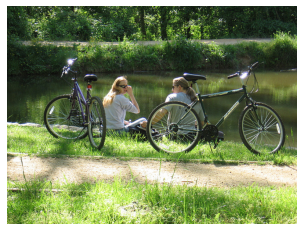

1/1 [==============================] - 0s 32ms/step
man in blue shirt and helmet riding his bike on the dirt with crowd of people watch behind him in the background and rider waiting on the ground and the first comes comes


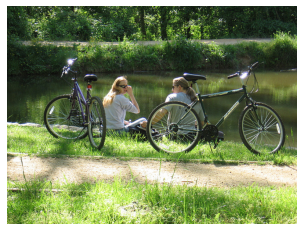

In [99]:
for i in range(15):
    idx=np.random.randint(0,1000)
    img_names=list(encoding_test.keys())[idx]
    photo_2048=encoding_test[img_name].reshape((1,2048))
    i=plt.imread(images_path+img_name+".jpg")
    caption=predict_caption(photo_2048)
    print(caption)
    plt.imshow(i)
    plt.axis("off")
    plt.show()

In [76]:
#encoding_test["3385593926_d3e9c21170"].shape

(2048,)

In [81]:
images_path

'C:/Users/KIIT/OneDrive/Desktop/minor_project/archive (5)/Flickr_Data/Images/'